<a href="https://colab.research.google.com/github/kaushalprasadhial/image_segmentation/blob/master/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
!pip install spicy
from scipy import ndimage

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


(192, 263, 3)


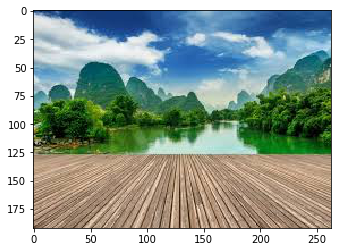

In [11]:
image = plt.imread('/content/drive/My Drive/Colab Notebooks/image segmentation/1.jpeg')
print(image.shape)
plt.imshow(image)

# first method
mean of the pixel values and use that as a threshold

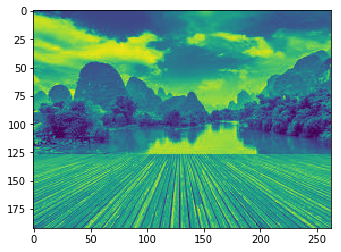

In [6]:
gray = rgb2gray(image)
plt.imshow(gray)

In [7]:
gray.shape

(192, 263)

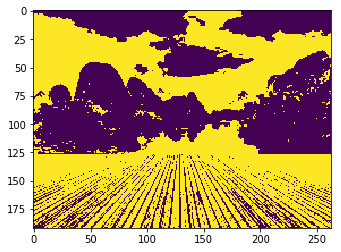

In [9]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
  if gray_r[i] < gray_r.mean():
    gray_r[i] = 0
  else:
    gray_r[i] = 1
    
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray)
  

# multiple threshold for multiple objects

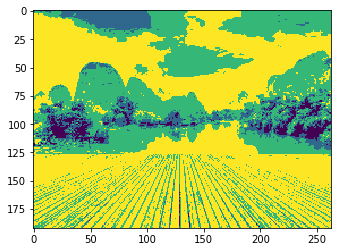

In [10]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
gray_mean = gray_r.mean()
for i in range(gray_r.shape[0]):
  if gray_r[i] > gray_mean:
    gray_r[i] = 3
  elif gray_r[i] > gray_mean*.5:
    gray_r[i] = 2
  elif gray_r[i] > gray_mean*.25:
    gray_r[i] = 1
  else: 
    gray_r[i] = 0
    
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray)
    

# Edge Detection Segmentation

In [0]:
sobel_horizontal = np.array([np.array([1,2,1]),np.array([0,0,0]),np.array([-1,-2,-1])])
sobel_vertical = np.array([np.array([1,0,-1]),np.array([2,0,-2]),np.array([1,-0,-1])])
out_h = ndimage.convolve(gray, sobel_horizontal, mode = 'reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode = 'reflect')

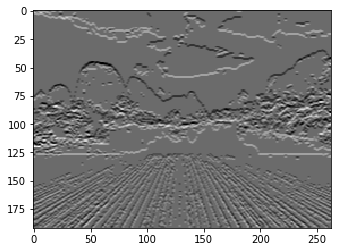

In [16]:
plt.imshow(out_h, cmap ='gray')

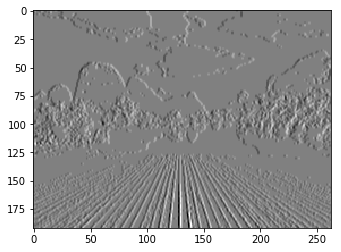

In [17]:
plt.imshow(out_v, cmap = 'gray')

# laplace operator

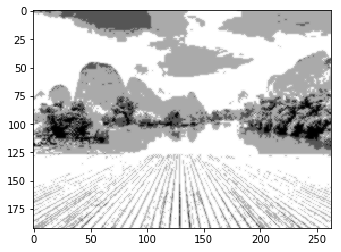

In [18]:
laplace_operator = np.array([np.array([1,1,1]),np.array([1,8,1]),np.array([1,1,1])])
out_l = ndimage.convolve(gray, laplace_operator, mode = 'reflect')
plt.imshow(out_l, cmap = 'gray')

# Image Segmentation based on Clustering

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(192, 263, 3)


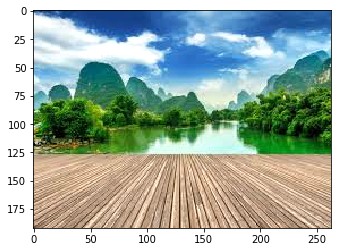

In [12]:
pic = plt.imread('/content/drive/My Drive/Colab Notebooks/image segmentation/1.jpeg')/225
print(pic.shape)
plt.imshow(pic)

In [13]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [0]:
# using k-mean clustring algorithm
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmean.cluster_centers_[kmean.labels_]

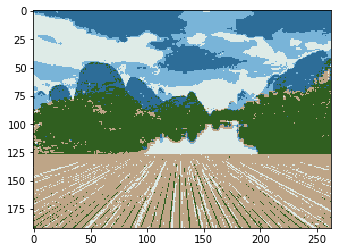

In [18]:
clustred_pic = pic2show.reshape(pic.shape[0],pic.shape[1],pic.shape[2])
plt.imshow(clustred_pic)